In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import scienceplots

In [2]:
plt.style.use(['science', 'ieee'])

In [3]:
def Calc_mtt(event_momentums):
    four_vec = np.zeros(4)

    for i in range(len(event_momentums)):
        four_vec += event_momentums[i]
    
    mtt = np.sqrt(four_vec[0]**2 - four_vec[1]**2 - four_vec[2]**2 - four_vec[3]**2)

    return mtt

In [4]:
mass_A = []
mass_B = []
sol = ['111000', '000111']

TP_results = 0
TN_results = 0
FP_results = 0
FN_results = 0
TP_files, TN_files, FP_files, FN_files = list(), list(), list(), list()

mtt_temp = []
M_tt = 2*172.5
masscut = np.array([ M_tt,  M_tt*1.25,  M_tt*1.50,  M_tt*1.75,  M_tt*2,  M_tt*2.50,  M_tt*3, M_tt*5])
Mass_Tags = np.zeros((1, 5))

In [5]:
ansatz_type = 'Ansatz 2'
ham_type = 'H1'
path = f'./{ansatz_type}, {ham_type}'

file_list = os.listdir(path)

for file in file_list:
    data = np.load(f'./{ansatz_type}, {ham_type}/{file}')

    mass = data['Mass_Division']
    results = data['Simulation_Result']
    eigenvectors = data['Eigenvector']
    momentum = data['Momentum']
    data.close()

    ham_ground_state1 = eigenvectors[0]
    ham_ground_state2 = eigenvectors[1]
    result_ground_state1 = results[0][0]
    result_ground_state2 = results[1][0]
    mass_A.append(mass[0])
    mass_B.append(mass[1])

    ### Classification Efficiency(Confusion Martrix) ###
    # True (Ground state of the hamiltonian is ['111000', '000111'])
    if sol[0] in ham_ground_state1 or sol[0] in ham_ground_state2 or sol[1] in ham_ground_state1 or sol[1] in ham_ground_state2:
        # Positve (Most Frequent state with sim. is the ground sate)
        if result_ground_state1 in ham_ground_state1 or result_ground_state1 in ham_ground_state2 or result_ground_state2 in ham_ground_state1 or result_ground_state2 in ham_ground_state2:
            TP_results += 1
            TP_files.append(file)
            TP_val, TN_val, FP_val, FN_val = 1, 0, 0, 0
        # Negative (Most Frequent state with sim. is not the ground sate)
        else :
            TN_results += 1
            TN_files.append(file)
            TP_val, TN_val, FP_val, FN_val = 0, 1, 0, 0
            
    # False (Ground state of the hamiltonian is not ['111000', '000111'])
    else:
        # Positive (Most Frequent state with sim. is the ground sate of the hamiltonian)
        if result_ground_state1 in ham_ground_state1 or result_ground_state1 in ham_ground_state2 or result_ground_state2 in ham_ground_state1 or result_ground_state2 in ham_ground_state2:
            FP_results += 1
            FP_files.append(file)
            TP_val, TN_val, FP_val, FN_val = 0, 0, 1, 0
        # Negative (Most Frequent state with sim. is not the ground sate of the hamiltonian)
        else :
            FN_results += 1
            FN_files.append(file)
            TP_val, TN_val, FP_val, FN_val = 0, 0, 0, 1

    mtt = Calc_mtt(momentum)
    m_tt_temp = np.array([mtt, TP_val, FN_val, FP_val, TN_val])
    Mass_Tags = np.vstack((Mass_Tags, m_tt_temp))


In [6]:
TP_rate = TP_results / len(mass_A) * 100
TN_rate = TN_results / len(mass_A) * 100
FP_rate = FP_results / len(mass_A) * 100
FN_rate = FN_results / len(mass_A) * 100

print(f"True Positive Convergence : {TP_results} / {len(mass_A)} ({TP_rate} %)")
print(f"False Positive Convergence : {FP_results} / {len(mass_A)} ({FP_rate} %)")
print(f"Ground Sate Converging Rate : {TP_rate + FP_rate} %")
print("---------------------------------------------------------------------")
print(f"True Negative Convergence : {TN_results} / {len(mass_A)} ({TN_rate} %)")
print(f"False Negative Convergence : {FN_results} / {len(mass_A)} ({FN_rate} %)")
print(f"Non Ground Sate Converging Rate : {TN_rate + FN_rate} %")
print("---------------------------------------------------------------------")


True Positive Convergence : 54 / 86 (62.7906976744186 %)
False Positive Convergence : 23 / 86 (26.744186046511626 %)
Ground Sate Converging Rate : 89.53488372093022 %
---------------------------------------------------------------------
True Negative Convergence : 4 / 86 (4.651162790697675 %)
False Negative Convergence : 5 / 86 (5.813953488372093 %)
Non Ground Sate Converging Rate : 10.465116279069768 %
---------------------------------------------------------------------


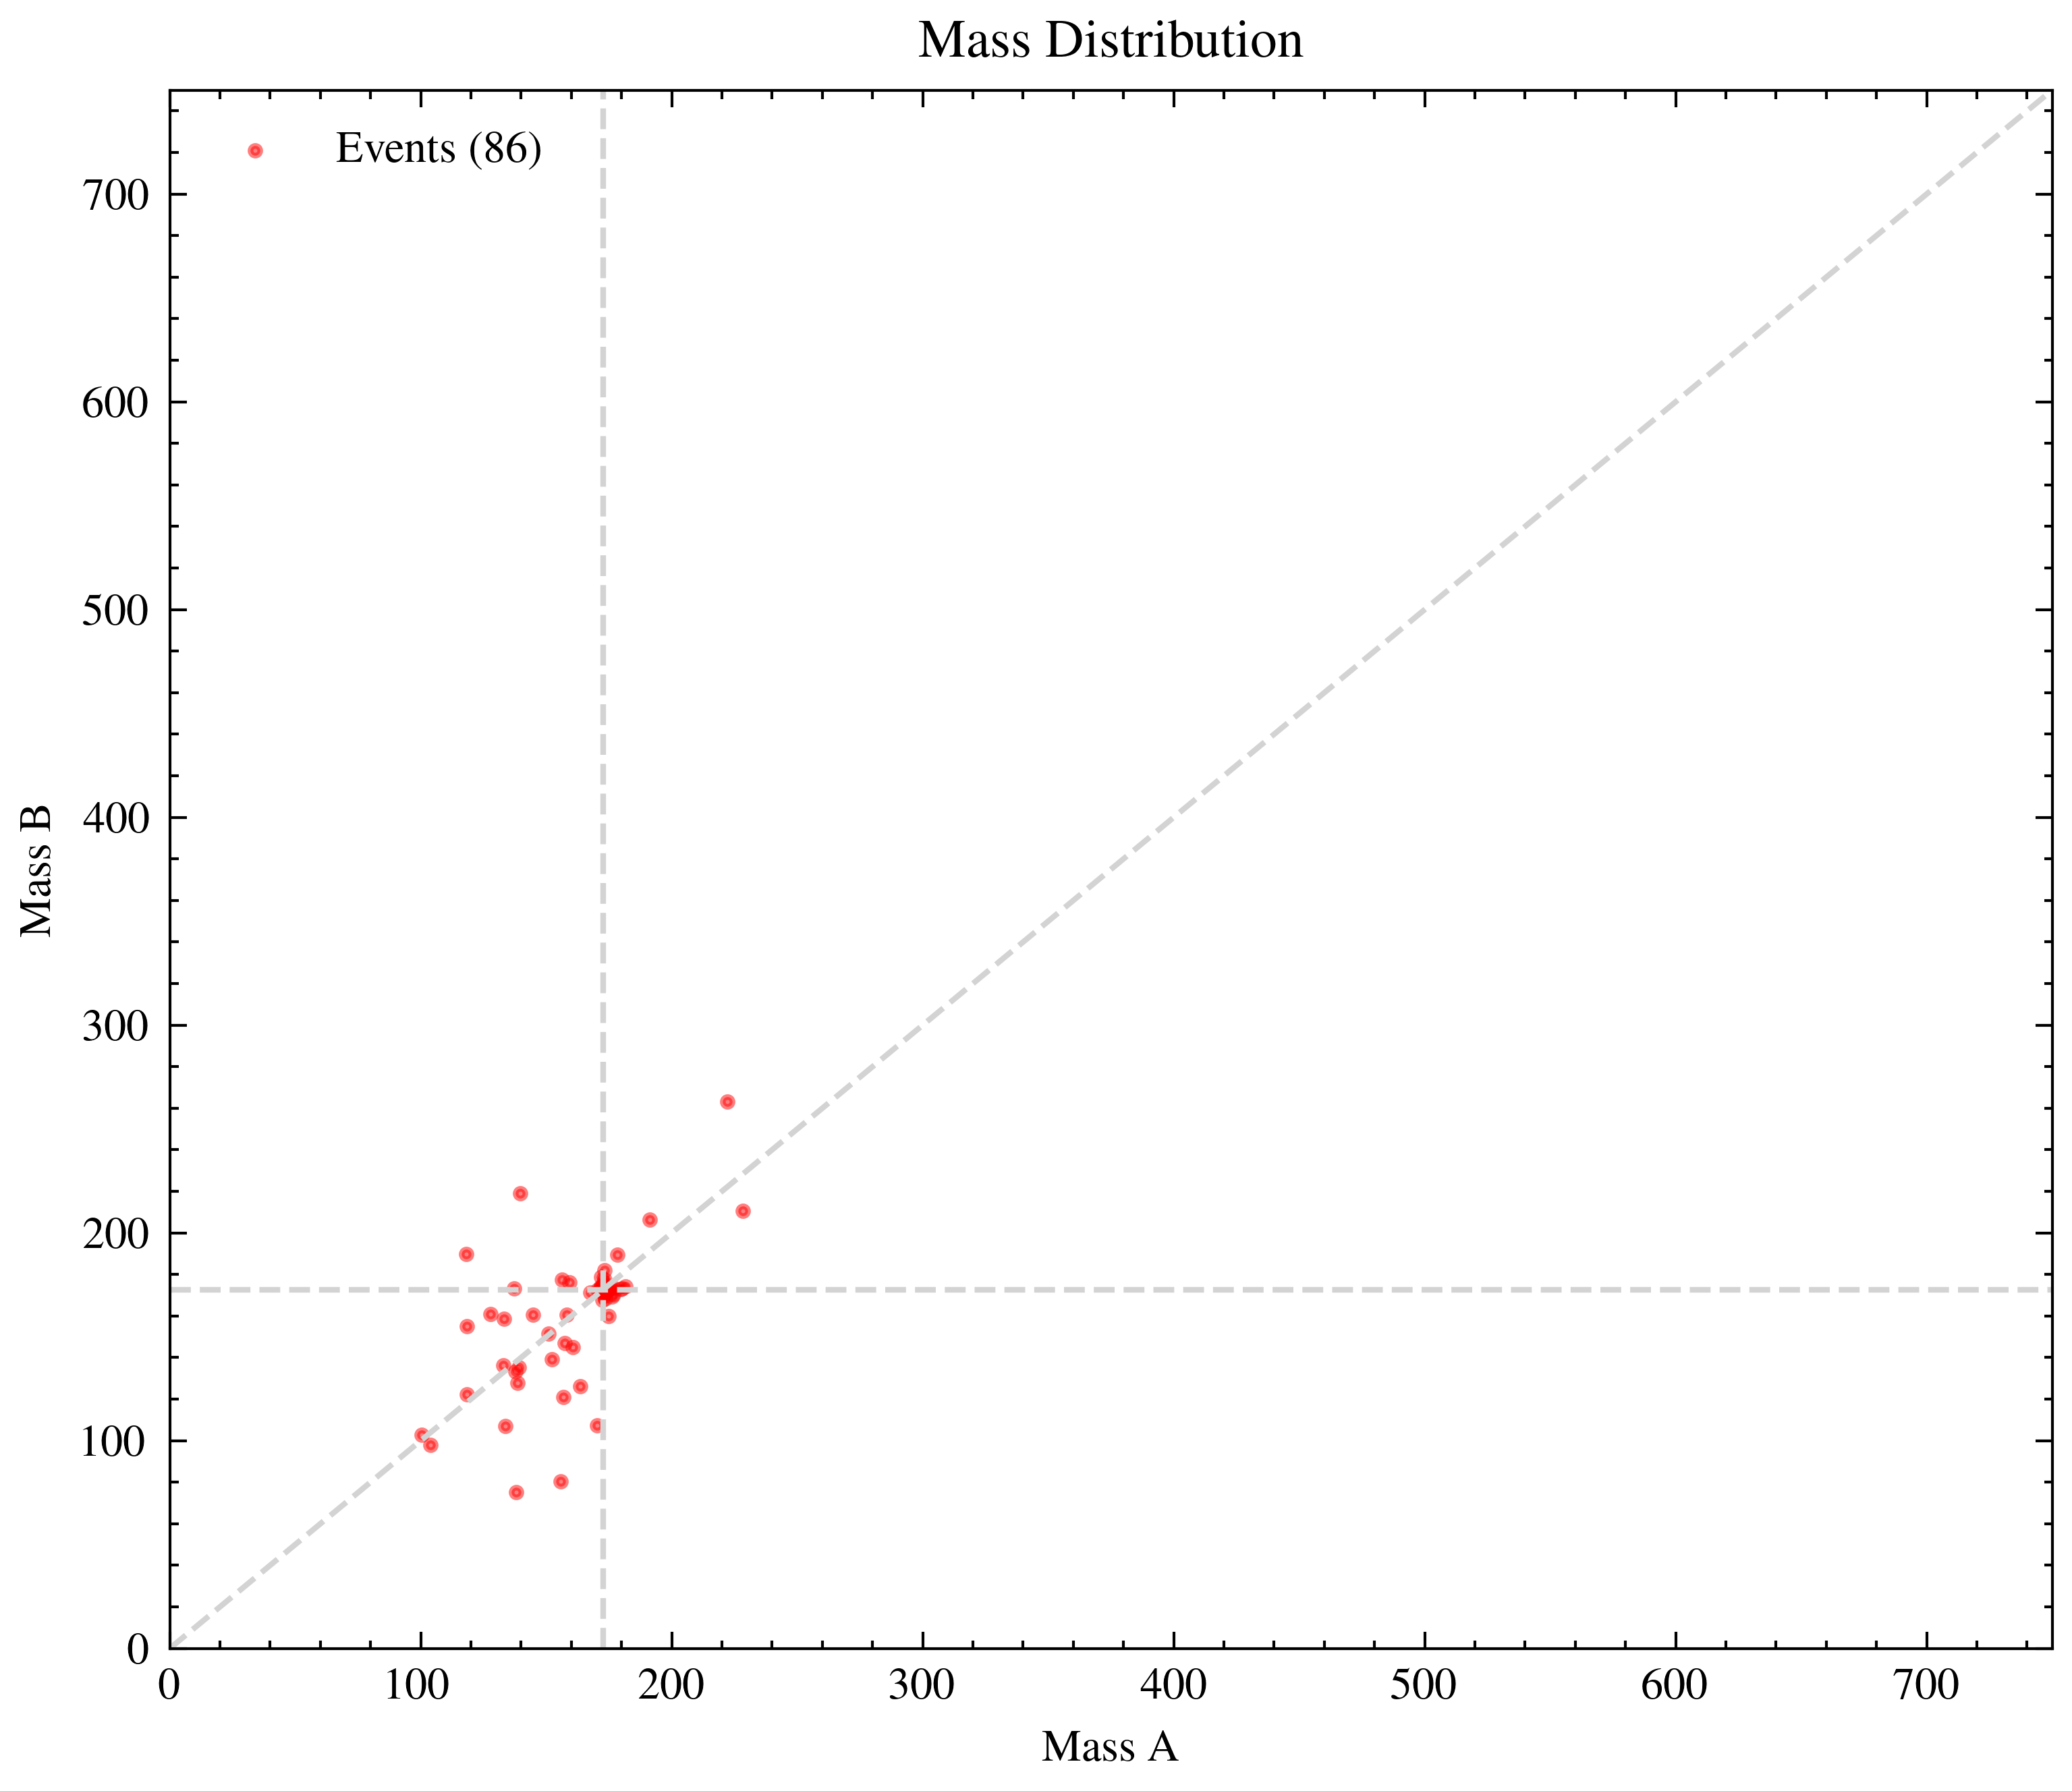

In [7]:
fig = plt.figure(figsize = (6, 5))
fig.set_facecolor('white')

plt.hlines(172.76, 0, 750, colors='lightgray', linestyles='--')
plt.vlines(172.76, 0, 750, colors='lightgray', linestyles='--')
plt.plot([0, 750], [0, 750], color='lightgray', linestyle='--')

plt.scatter(mass_A, mass_B, c = 'red', s = 3, alpha = 0.5, label = f'Events ({len(mass_A)})')
plt.xlim(0, 750)
plt.ylim(0, 750)

plt.title("Mass Distribution")
plt.xlabel("Mass A")
plt.ylabel("Mass B")

plt.legend()

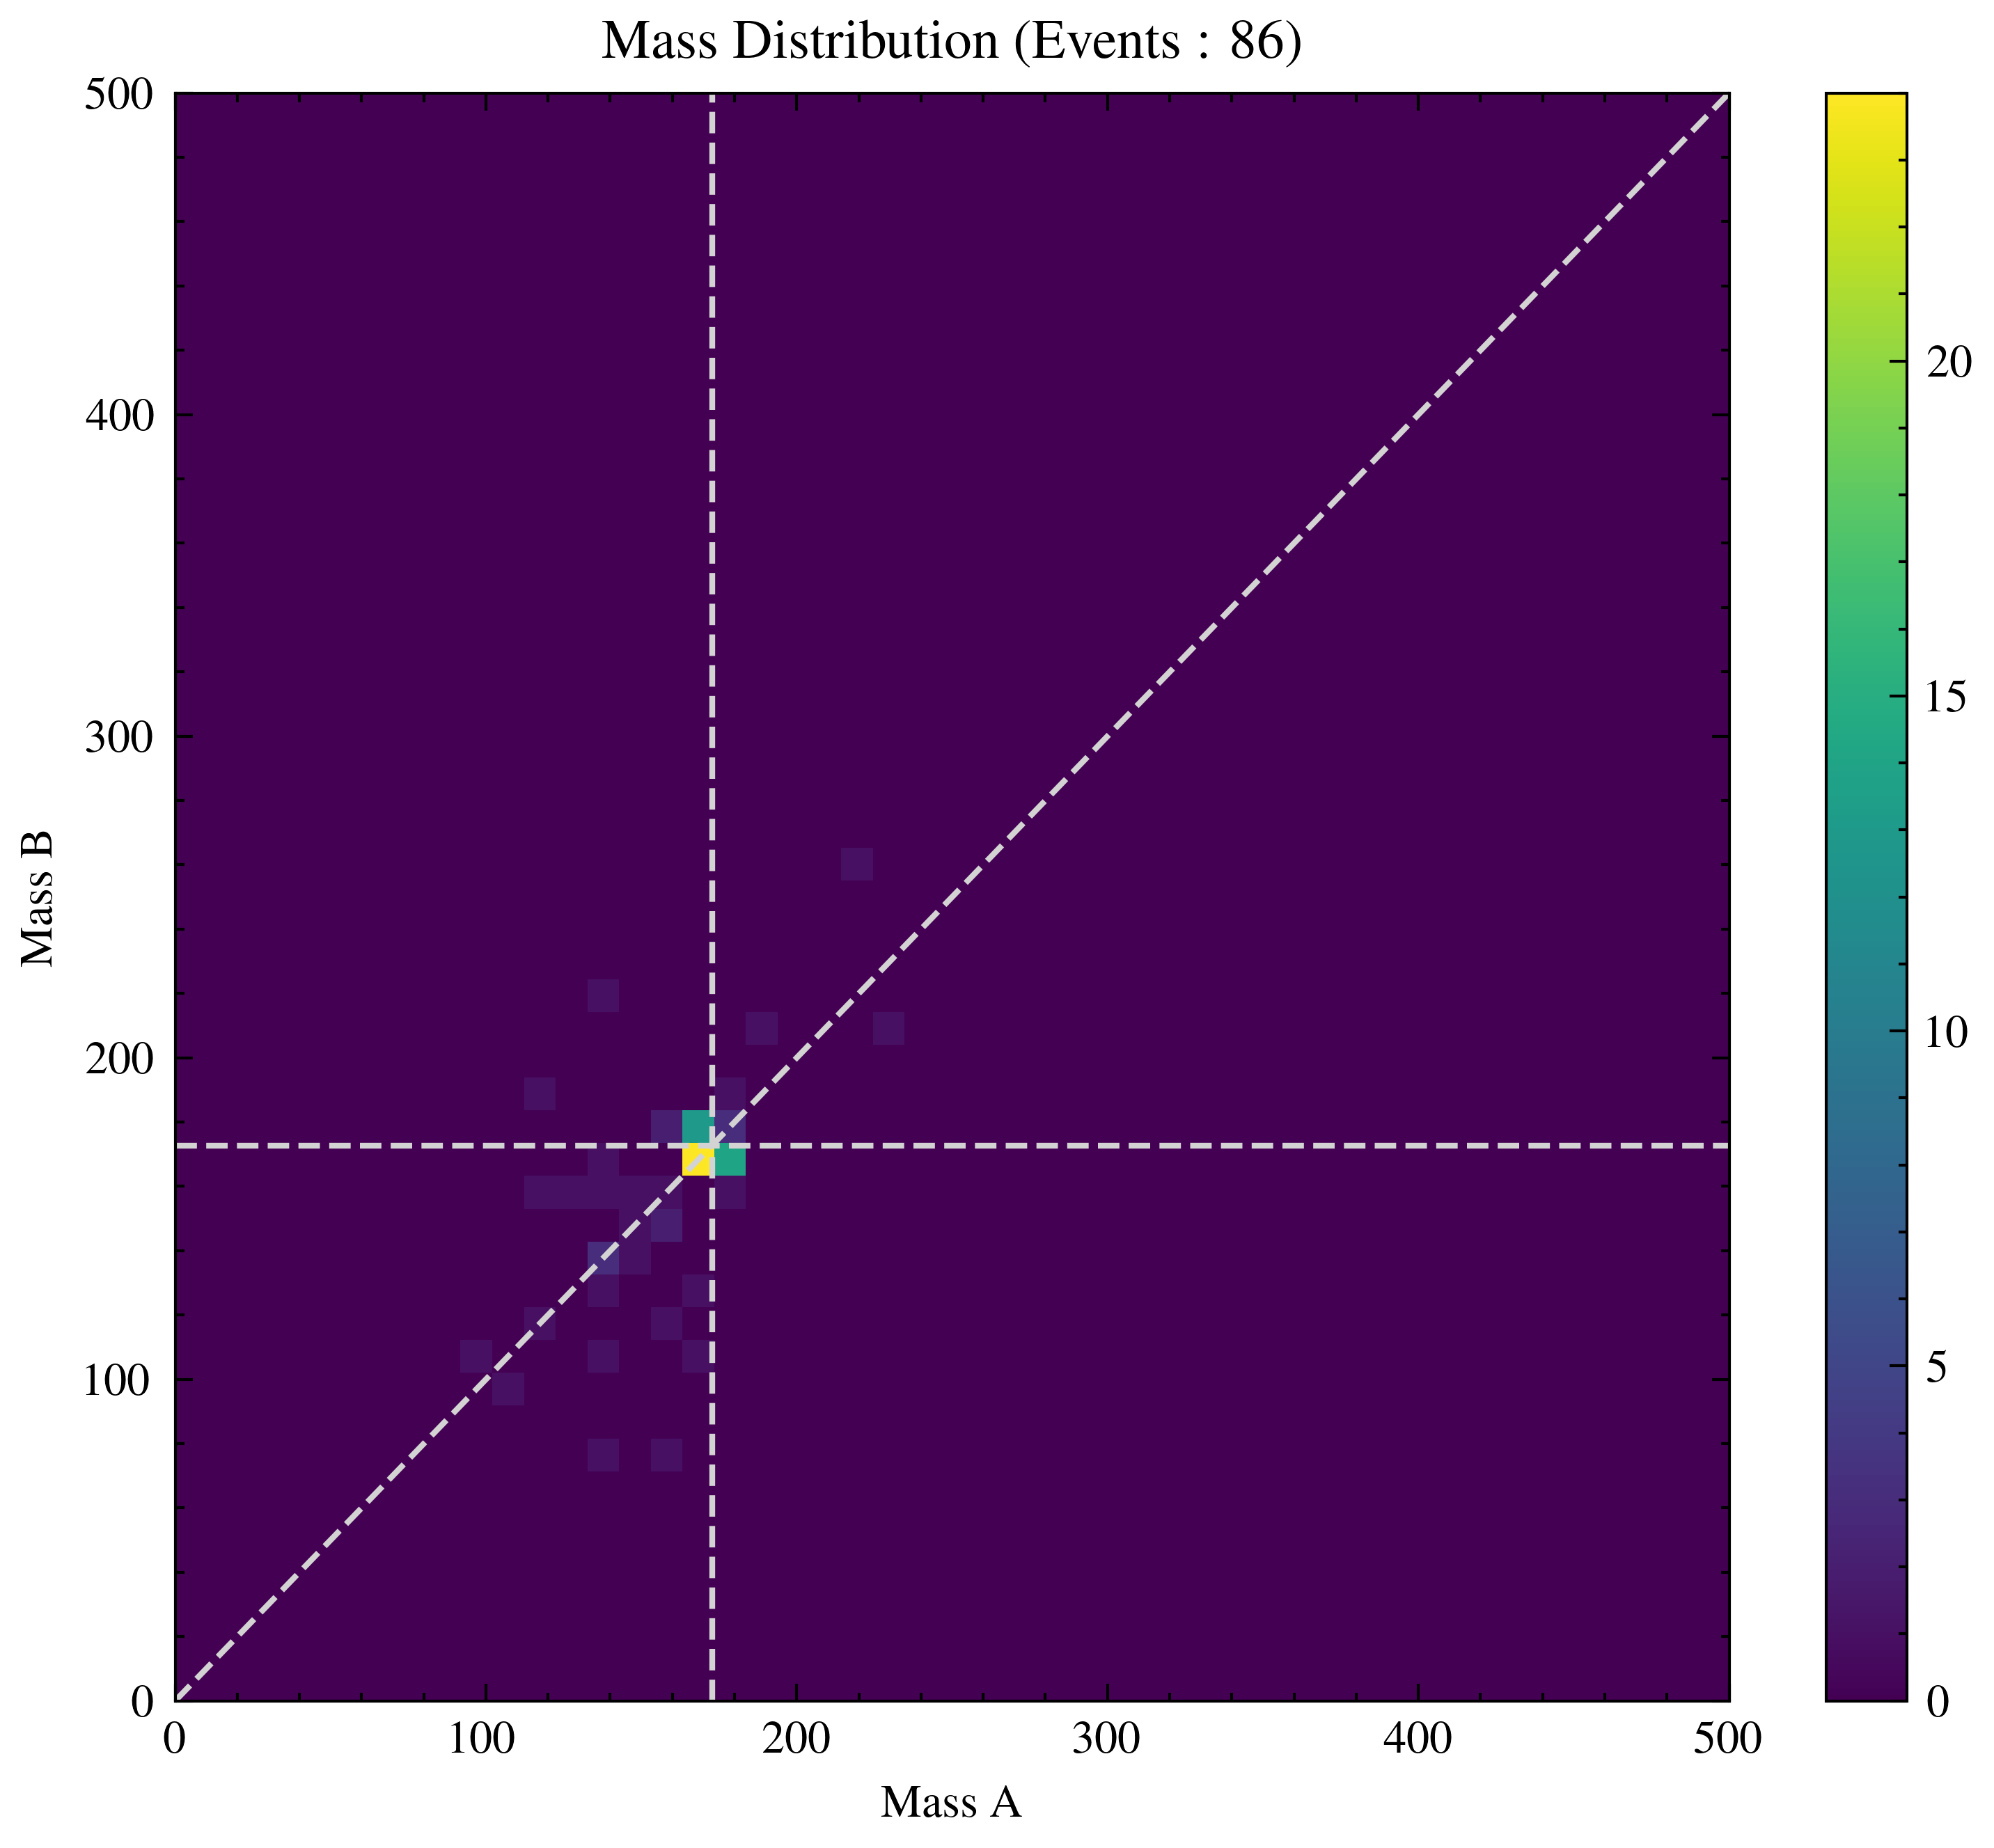

In [8]:
# Plot setup
fig, ax = plt.subplots(figsize=(6, 5))

# Reference lines
plt.hlines(172.76, 0, 500, colors='lightgray', linestyles='--')
plt.vlines(172.76, 0, 500, colors='lightgray', linestyles='--')
plt.plot([0, 500], [0, 500], color='lightgray', linestyle='--')

# Heatmap with proper binning
h = plt.hist2d(mass_A, mass_B, 
               bins=[np.linspace(0, 500, 50), np.linspace(0, 500, 50)])

# Colorbar adjustment
plt.colorbar(h[3], ax=ax)

# Axes limits
plt.xlim(0, 500)
plt.ylim(0, 500)

# Labels and title
plt.title(f"Mass Distribution (Events : {len(mass_A)})")
plt.xlabel("Mass A")
plt.ylabel("Mass B")

plt.show()


In [9]:
Mtt = 2*172.5
masscut = np.array([ Mtt,  Mtt*1.25,  Mtt*1.50,  Mtt*1.75,  Mtt*2,  Mtt*2.50,  Mtt*3, Mtt*5])
mtt_temp = Mass_Tags[:, 0]
H_QITE_efficiency = np.zeros(7)

for i in range(7):
    Index = np.logical_and(mtt_temp>masscut[i], mtt_temp<(masscut[i+1]))
    if len(Mass_Tags[Index]) == 0:
        H_QITE_efficiency[i] = 0
    else:
        H_QITE_efficiency[i] = np.count_nonzero(Mass_Tags[Index][:,1]) / len(Mass_Tags[Index])

H_QITE_efficiency

array([0.19230769, 0.7037037 , 0.85714286, 0.8       , 1.        ,
       1.        , 0.        ])

In [10]:
### H0(ttbar)
#H0_lim_efficiency =  np.array([0.78832203, 0.8471124 , 0.89163083, 0.91924829, 0.93794326, 0.95763889, 0.97765641])
H0_QITE_ans1 = np.array([0.54069767, 0.56410256, 0.64516129, 0.79591837, 0.75      ,0.77777778, 0.57142857])
#H0_QAOA_efficiency = np.array([0.229 , 0.2045, 0.2265, 0.221 , 0.2165, 0.2225])
#H0_MAQAOA_efficiency = np.array([0.629 , 0.7035, 0.7255, 0.755 , 0.7625, 0.7695])
#H0_FALQON_200_efficiency = np.array([0.666 , 0.655 , 0.6165, 0.585 , 0.5545, 0.512])
#H0_FALQON_1500_efficiency = np.array([0.6555, 0.675 , 0.694 , 0.724 , 0.7495, 0.7335])

In [11]:
### H0 + \lambda H1(ttbar)
H1_lim_efficiency =  np.array([0.15148195, 0.71424033, 0.91082445, 0.96366743, 0.98366261, 0.99027778, 0.9980139])
H1_QITE_ans1 = np.array([0.1626506 , 0.68531469, 0.91139241, 0.97619048, 0.97435897, 1.        , 1.        ])
#H1_QAOA_efficiency = np.array([0.0435, 0.444 , 0.6955, 0.721 , 0.7285, 0.7235])
#H1_MAQAOA_efficiency = np.array([0.028 , 0.5905, 0.9125, 0.9775, 0.9965, 1])
#H1_FALQON_200_efficiency = np.array([0.0235, 0.511 , 0.86 , 0.9475, 0.9695, 0.961])
#H1_FALQON_1500_efficiency = np.array([0.0295, 0.5745, 0.909 , 0.9745, 0.9975, 0.999])

In [12]:
### H2(ttbar)
#H2_lim_efficiency = np.array([0.77644864, 0.85812624, 0.91630834, 0.94487472, 0.96162614, 0.97916667, 0.98709037])
H2_QITE_an1 = np.array([0.31491713, 0.55284553, 0.76744186, 0.64102564, 0.79166667,0.7       , 0.9       ])

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/var/folders/8x/lky2tzdd5d1_c4s2m36s6fb80000gn/T/ipykernel_96035/2824585847.py:4: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Efficiency of the Hamiltonian $H_0 + \lambda H_1$', fontdict={'fontsize': 15})


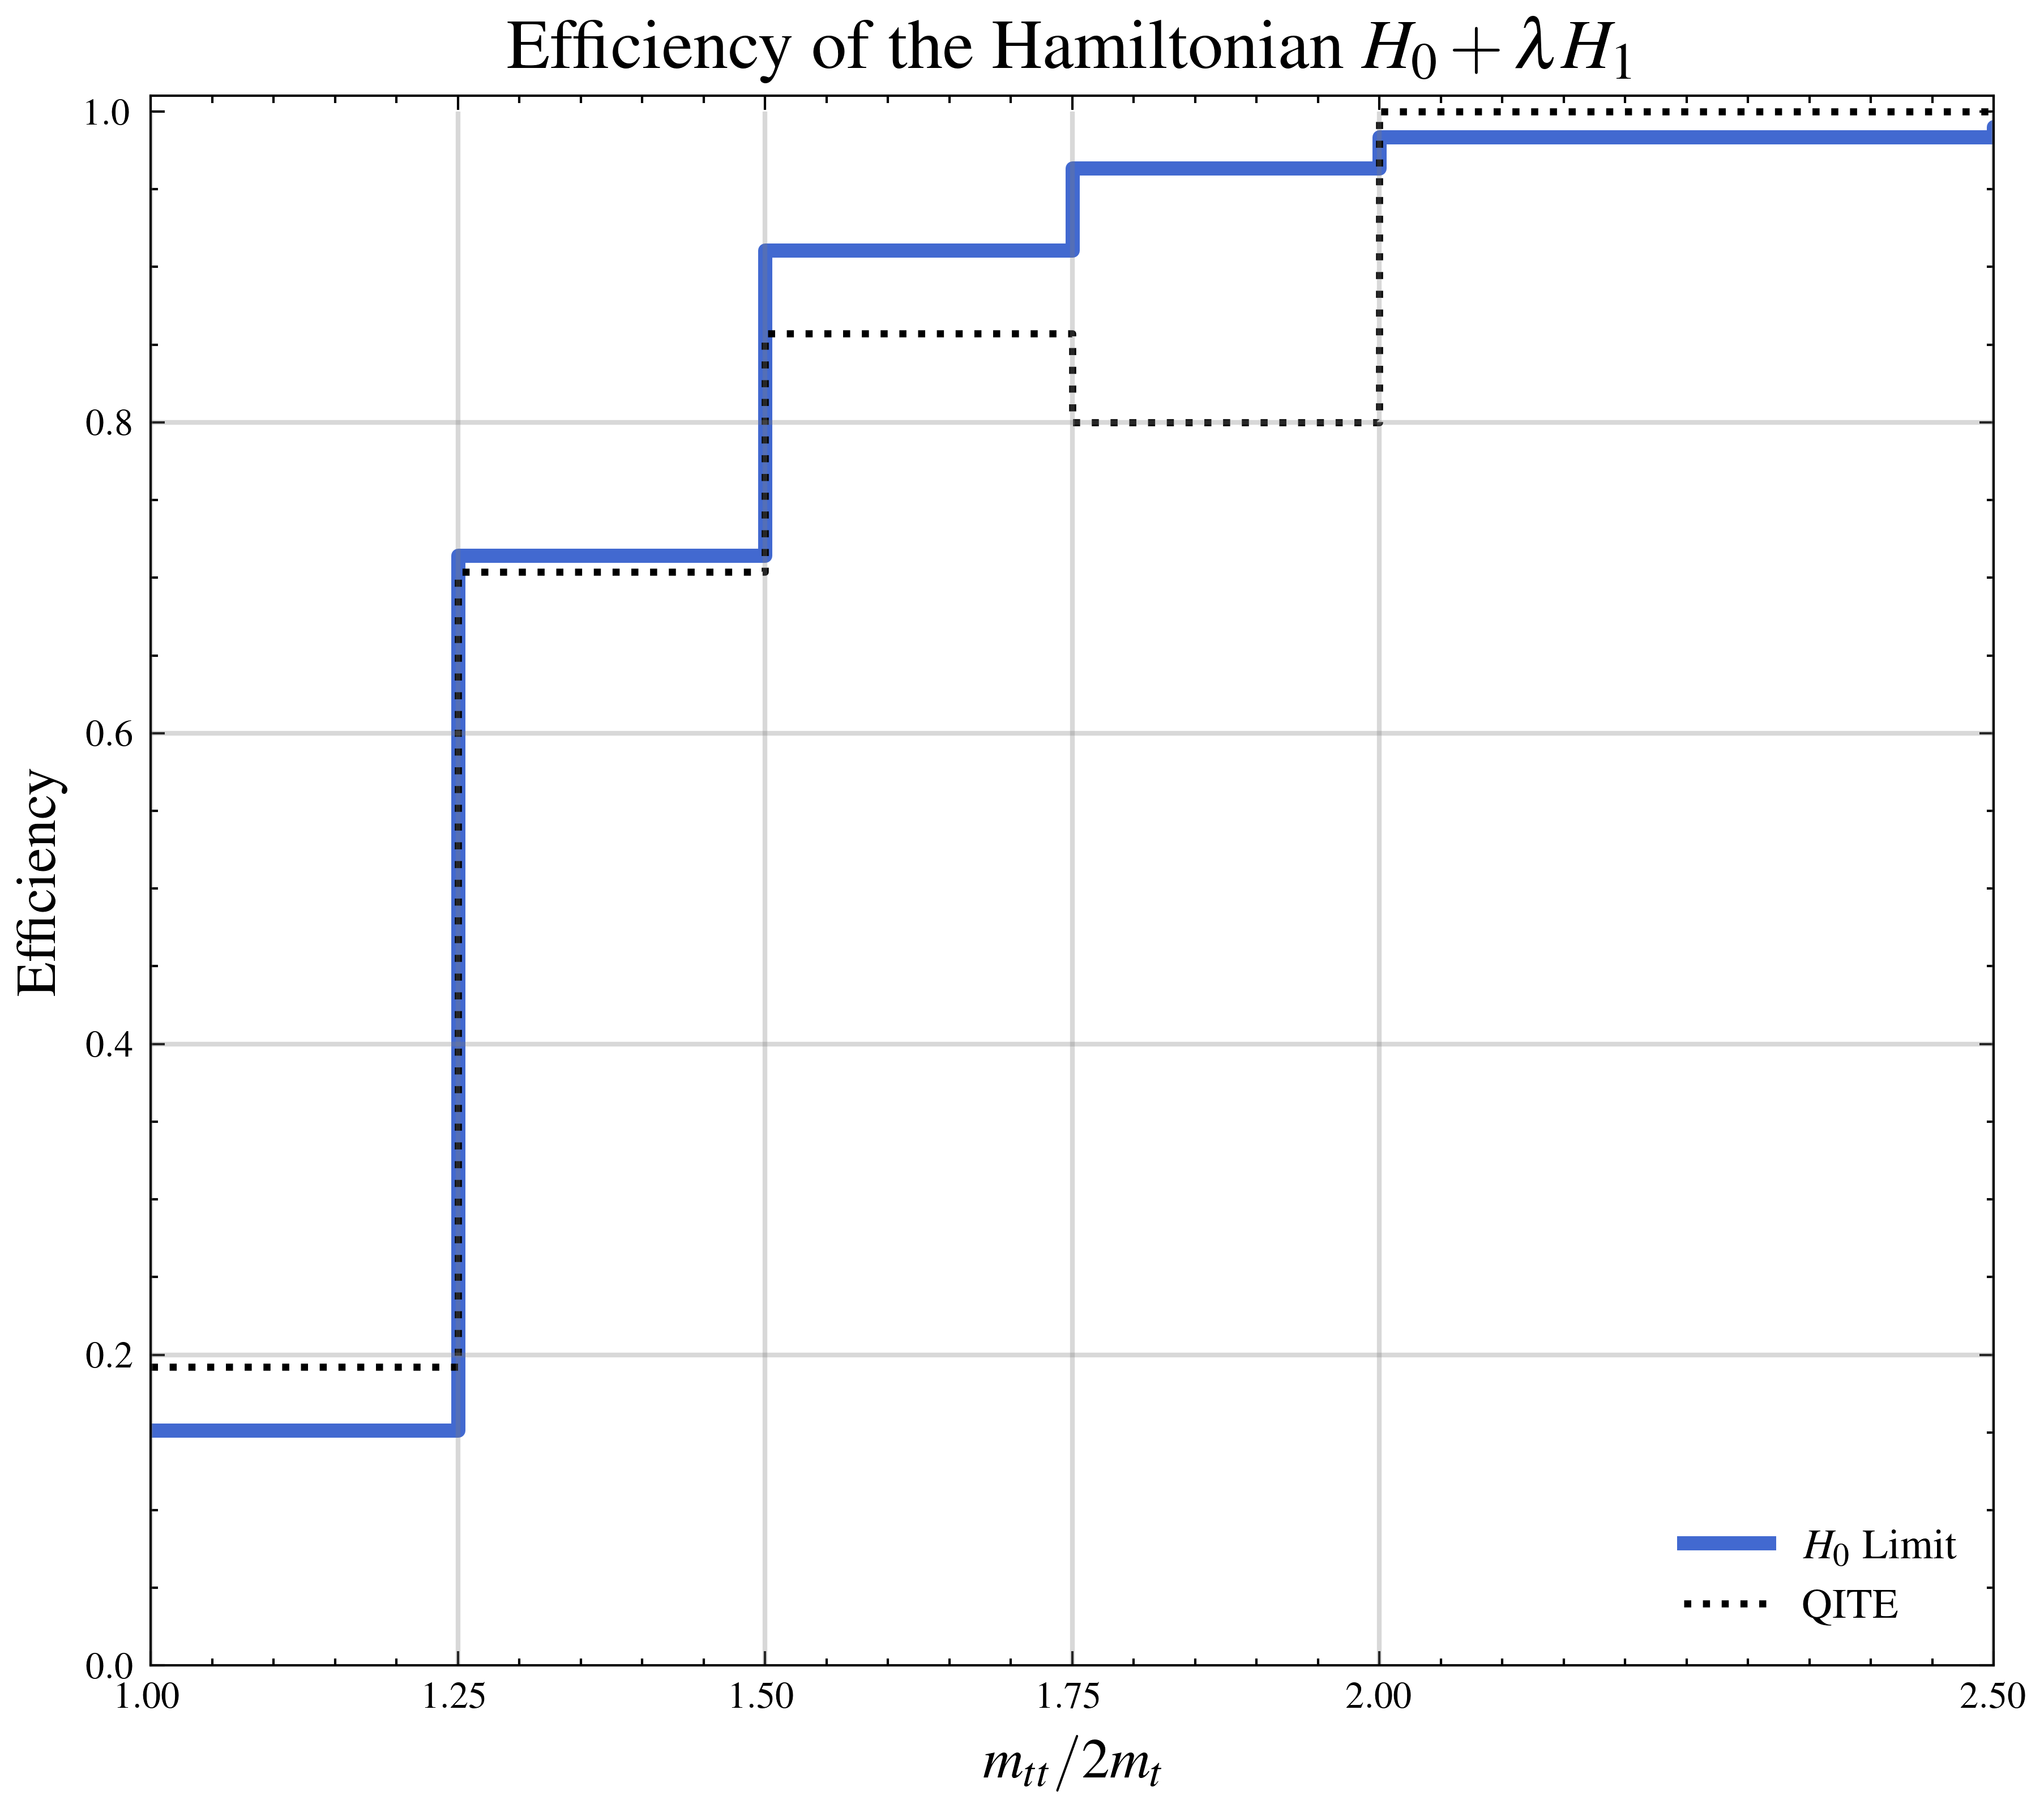

In [13]:
Mass_ratio = np.array([ 1,  1.25,  1.50, 1.75,  2, 2.50,  3, 5])  

plt.figure(figsize=(7, 6))
plt.title(f'Efficiency of the Hamiltonian $H_0 + \lambda H_1$', fontdict={'fontsize': 15})

plt.step(Mass_ratio[:7], H1_lim_efficiency[:8], color = '#4269D0FF',linewidth = 3, label = '$H_0$ Limit', where = 'post')
plt.step(Mass_ratio[:7], H_QITE_efficiency[:8], color = 'black',linewidth = 1.5, linestyle = ':', label = 'QITE', where = 'post')

plt.vlines(x = Mass_ratio[:7], ymin=0, ymax=1, colors='grey', alpha = 0.3)
plt.hlines(y = [0.2,0.4,0.6,0.8], xmin=1, xmax=3, colors='grey', alpha = 0.3)

plt.xlabel(r'$m_{tt}/2m_t$', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.xticks(Mass_ratio[:7])
plt.ylim([0,1.01])
plt.xlim([1,2.5])
plt.legend(fontsize=9, loc='lower right', frameon=False)
plt.show()

In [14]:
stp

NameError: name 'stp' is not defined

### True Positive Case

In [ ]:
TP_event = np.random.choice(TP_files, 1)
data = np.load(f'./{ansatz_type}, {ham_type}/{TP_event[0]}')

Energies = data['QITE_Evolving']
Ground_Energy = data['Eigenvalues'][0]
data.close()

plt.title(f'Convergence of the QITE (TP case : {TP_event[0]})')
plt.plot(1  - Energies / Ground_Energy , label = '1 - AR (Event : {envent_idx})')
plt.ylim([1e-3, 2])
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('1 - AR')

In [ ]:
data = np.load(f'./{ansatz_type}, {ham_type}//{TP_event[0]}')

Eigenvalues = data['Eigenvalues']
Eigenvectors = data['Eigenvector']
Energy = data['QITE_Evolving']
data.close()

print(Eigenvalues[0:8])

eigvec = []
for vec in Eigenvectors:
    eigvec.append(vec)

sort_eigvec = np.sort(np.array(eigvec)[:,0])
sort_idx = np.argsort(np.array(eigvec)[:,0])

x_values = np.arange(len(eigvec)) 

fig, ax = plt.subplots(figsize=(20, 6))

plt.text(0.5,  0.75, 'Difference between the first and second eigenvalues {:5f}'.format(np.abs(Eigenvalues[0] - Eigenvalues[2])), fontsize=12)
plt.plot(x_values, Eigenvalues[sort_idx], '.-', linewidth = 1, label = 'Eigenvalues')
plt.hlines(Energy[-1], 0, len(eigvec), colors='darkred', linestyles='--', linewidth = 0.7, label = 'QITE Final Energy({:6f})(Steps : {})'.format(Energy[-1] ,len(Energy)))
plt.hlines(Eigenvalues[0],0, len(eigvec), linestyles=':', linewidth = 0.7, label = 'Ground Energy({:6f})'.format(Eigenvalues[0]))

ax.set_xticks(x_values)
ax.set_xticklabels(sort_eigvec, rotation=45, ha="right")

ax.set_xlabel("States")
ax.set_ylabel(r"$<H>$")
plt.title(f'TP case result ({TP_event[0]})')
plt.legend()

In [ ]:
data = np.load(f'./{ansatz_type}, {ham_type}//{TP_event[0]}')

Difference = data['Difference_Convergence']
data.close()

plt.plot(Difference)
plt.yscale('log')
plt.ylim(1e-8 ,1)
plt.hlines(1e-6, 0, len(Difference), linestyle = ':', color = 'red')
plt.hlines(1e-7, 0, len(Difference), linestyle = ':', color = 'blue')

### False Positive Case

In [ ]:
FP_event = np.random.choice(FP_files, 1)
data = np.load(f'./{ansatz_type}, {ham_type}//{FP_event[0]}')

Energies = data['QITE_Evolving']
Ground_Energy = data['Eigenvalues'][0]
data.close()

plt.title(f'Convergence of the QITE (FP case : {FP_event[0]})')
plt.plot(1  - Energies / Ground_Energy , label = '1 - AR (Event : {envent_idx})')
plt.ylim([1e-3, 2])
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('1 - AR')

In [ ]:
data = np.load(f'./{ansatz_type}, {ham_type}//{FP_event[0]}')

Eigenvalues = data['Eigenvalues']
Eigenvectors = data['Eigenvector']
Energy = data['QITE_Evolving']
data.close()

print(Eigenvalues[0:8])

eigvec = []
for vec in Eigenvectors:
    eigvec.append(vec)

sort_eigvec = np.sort(np.array(eigvec)[:,0])
sort_idx = np.argsort(np.array(eigvec)[:,0])

x_values = np.arange(len(eigvec)) 

fig, ax = plt.subplots(figsize=(20, 6))

plt.text(0.5,  0.75, 'Difference between the first and second eigenvalues {:5f}'.format(np.abs(Eigenvalues[0] - Eigenvalues[2])), fontsize=12)
plt.plot(x_values, Eigenvalues[sort_idx], '.-', linewidth = 1, label = 'Eigenvalues')
plt.hlines(Energy[-1], 0, len(eigvec), colors='darkred', linestyles='--', linewidth = 0.7, label = 'QITE Final Energy({:6f})(Steps : {})'.format(Energy[-1] ,len(Energy)))
plt.hlines(Eigenvalues[0],0, len(eigvec), linestyles=':', linewidth = 0.7, label = 'Ground Energy({:6f})'.format(Eigenvalues[0]))

ax.set_xticks(x_values)
ax.set_xticklabels(sort_eigvec, rotation=45, ha="right")

ax.set_xlabel("States")
ax.set_ylabel(r"$<H>$")
plt.title(f'FP case result ({FP_event[0]})')
plt.legend()

In [ ]:
data = np.load(f'./{ansatz_type}, {ham_type}//{FP_event[0]}')

Difference = data['Difference_Convergence']
data.close()

plt.plot(Difference)
plt.yscale('log')
plt.ylim(1e-8 ,1)
plt.hlines(1e-6, 0, len(Difference), linestyle = ':', color = 'red')
plt.hlines(1e-7, 0, len(Difference), linestyle = ':', color = 'blue')

### True Negative Case

In [ ]:
TN_event = np.random.choice(TN_files, 1)
data = np.load(f'./{ansatz_type}, {ham_type}/{TN_event[0]}')

Energies = data['QITE_Evolving']
Ground_Energy = data['Eigenvalues'][0]
data.close()

plt.title(f'Convergence of the QITE (TN case : {TN_event[0]})')
plt.plot(1  - Energies / Ground_Energy , label = '1 - AR (Event : {envent_idx})')
plt.ylim([1e-3, 2])
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('1 - AR')

In [ ]:
data = np.load(f'./{ansatz_type}, {ham_type}/{TN_event[0]}')

Eigenvalues = data['Eigenvalues']
Eigenvectors = data['Eigenvector']
Energy = data['QITE_Evolving']
State_Result = data['Simulation_Result']
data.close()

print(Eigenvalues[0:8])

eigvec = []
for vec in Eigenvectors:
    eigvec.append(vec)

sort_eigvec = np.sort(np.array(eigvec)[:,0])
sort_idx = np.argsort(np.array(eigvec)[:,0])

x_values = np.arange(len(eigvec)) 

fig, ax = plt.subplots(figsize=(20, 6))

plt.text(0.5,  .75, 'Difference between the first and second eigenvalues {:5f}'.format(np.abs(Eigenvalues[0] - Eigenvalues[2])), fontsize=12)
plt.plot(x_values, Eigenvalues[sort_idx], '.-', linewidth = 1, label = 'Eigenvalues')
plt.hlines(Energy[-1], 0, len(eigvec), colors='darkred', linestyles='--', linewidth = 0.7, label = 'QITE Final Energy({:6f})(Steps : {})'.format(Energy[-1] ,len(Energy)))
plt.hlines(Eigenvalues[0],0, len(eigvec), linestyles=':', linewidth = 0.7, label = 'Ground Energy({:6f})'.format(Eigenvalues[0]))

ax.set_xticks(x_values)
ax.set_xticklabels(sort_eigvec, rotation=45, ha="right")

ax.set_xlabel("States")
ax.set_ylabel(r"$<H>$")
plt.title(f'TN case result ({TN_event[0]})')
plt.legend()

In [ ]:
data = np.load(f'./{ansatz_type}, {ham_type}//{TN_event[0]}')

Difference = data['Difference_Convergence']
data.close()

plt.plot(Difference)
plt.yscale('log')
plt.ylim(1e-8 ,1)
plt.hlines(1e-6, 0, len(Difference), linestyle = ':', color = 'red')
plt.hlines(1e-7, 0, len(Difference), linestyle = ':', color = 'blue')

### False Negative Case

In [ ]:
FN_event = np.random.choice(FN_files, 1)
data = np.load(f'./{ansatz_type}, {ham_type}/{FN_event[0]}')

Energies = data['QITE_Evolving']
Ground_Energy = data['Eigenvalues'][0]
data.close()

plt.title(f'Convergence of the QITE (FN case : {FN_event[0]})')
plt.plot(1  - Energies / Ground_Energy , label = '1 - AR (Event : {envent_idx})')
plt.ylim([1e-3, 2])
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('1 - AR')

In [ ]:
data = np.load(f'./{ansatz_type}, {ham_type}/{FN_event[0]}')

Eigenvalues = data['Eigenvalues']
Eigenvectors = data['Eigenvector']
Energy = data['QITE_Evolving']
data.close()

print(Eigenvalues[0:8])

eigvec = []
for vec in Eigenvectors:
    eigvec.append(vec)

sort_eigvec = np.sort(np.array(eigvec)[:,0])
sort_idx = np.argsort(np.array(eigvec)[:,0])

x_values = np.arange(len(eigvec)) 

fig, ax = plt.subplots(figsize=(20, 6))

plt.text(0.5,  0.75, 'Difference between the first and second eigenvalues {:5f}'.format(np.abs(Eigenvalues[0] - Eigenvalues[2])), fontsize=12)
plt.plot(x_values, Eigenvalues[sort_idx], '.-', linewidth = 1, label = 'Eigenvalues')
plt.hlines(Energy[-1], 0, len(eigvec), colors='darkred', linestyles='--', linewidth = 0.7, label = 'QITE Final Energy({:6f})(Steps : {})'.format(Energy[-1] ,len(Energy)))
plt.hlines(Eigenvalues[0],0, len(eigvec), linestyles=':', linewidth = 0.7, label = 'Ground Energy({:6f})'.format(Eigenvalues[0]))

ax.set_xticks(x_values)
ax.set_xticklabels(sort_eigvec, rotation=45, ha="right")

ax.set_xlabel("States")
ax.set_ylabel(r"$<H>$")
plt.title(f'FN case Energy Distribution({FN_event[0]})')
plt.legend()

In [ ]:
data = np.load(f'./{ansatz_type}, {ham_type}//{FN_event[0]}')

Difference = data['Difference_Convergence']
data.close()

plt.plot(Difference)
plt.yscale('log')
plt.ylim(1e-8 ,1)
plt.hlines(1e-6, 0, len(Difference), linestyle = ':', color = 'red')
plt.hlines(1e-7, 0, len(Difference), linestyle = ':', color = 'blue')